In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [6]:
data = pd.read_csv('TCS_stock_history.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [7]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [8]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [10]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(4463, 1)

In [11]:
#Preparing Data For Training 
X_train = []
y_train = []

for i in range (60,1149): #60 : timestamp // 1149: length of data
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [12]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))#adding batch size axis
X_train.shape

(1089, 60, 1)

In [13]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [14]:
hist = model.fit(X_train, y_train , epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 21s - loss: 3.3636e-04 - 21s/epoch - 607ms/step
Epoch 2/20
35/35 - 7s - loss: 2.4889e-04 - 7s/epoch - 206ms/step
Epoch 3/20
35/35 - 5s - loss: 2.4452e-04 - 5s/epoch - 147ms/step
Epoch 4/20
35/35 - 6s - loss: 2.5251e-04 - 6s/epoch - 177ms/step
Epoch 5/20
35/35 - 6s - loss: 2.5336e-04 - 6s/epoch - 168ms/step
Epoch 6/20
35/35 - 5s - loss: 2.6111e-04 - 5s/epoch - 156ms/step
Epoch 7/20
35/35 - 7s - loss: 2.4545e-04 - 7s/epoch - 211ms/step
Epoch 8/20
35/35 - 6s - loss: 2.4616e-04 - 6s/epoch - 176ms/step
Epoch 9/20
35/35 - 7s - loss: 2.4101e-04 - 7s/epoch - 189ms/step
Epoch 10/20
35/35 - 7s - loss: 2.4763e-04 - 7s/epoch - 186ms/step
Epoch 11/20
35/35 - 5s - loss: 2.5145e-04 - 5s/epoch - 130ms/step
Epoch 12/20
35/35 - 7s - loss: 2.5374e-04 - 7s/epoch - 203ms/step
Epoch 13/20
35/35 - 5s - loss: 2.5355e-04 - 5s/epoch - 155ms/step
Epoch 14/20
35/35 - 7s - loss: 2.4471e-04 - 7s/epoch - 186ms/step
Epoch 15/20
35/35 - 7s - loss: 2.4480e-04 - 7s/epoch - 188ms/step
Epoch 16/20
35/35

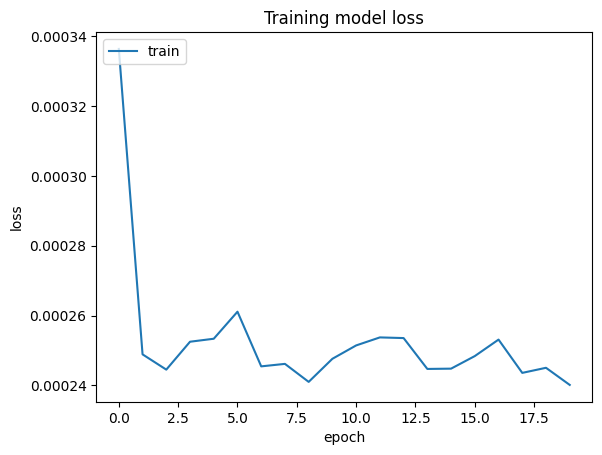

In [15]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [34]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test=[]
length = len(testData)
timestep = 60
for i  in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [49]:
y_pred = model.predict(X_test)
y_pred = np.array(X_test)

6/6 [==============================] - 0s 36ms/step


In [50]:
# predicted_price = sc.inverse_transform(y_pred)
predicted_price = sc.inverse_transform(y_pred.reshape(-1, 1))

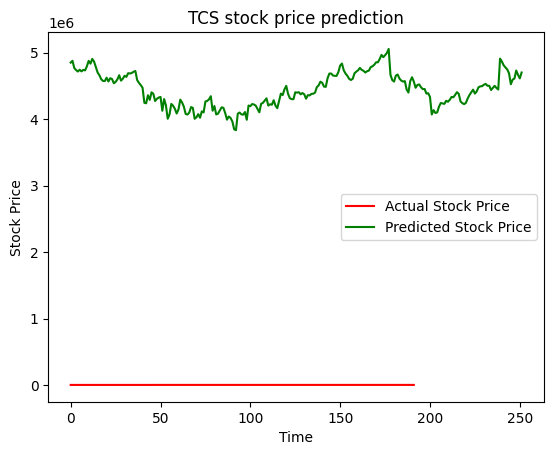

In [48]:
plt.plot(y_test,color='red',label='Actual Stock Price')
plt.plot(predicted_price, color='green',label='Predicted Stock Price')
plt.title('TCS stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()